## Tinsae @ Thinkful
https://www.kaggle.com/fernandol/countries-of-the-world
### Visualization Challenge

import all the neccessary modules

In [197]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
https://storage.googleapis.com/kaggle-datasets/23752/30346/countries-of-the-world.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1535169214&Signature=tOZbqAHAAzAUDrjisRQU5JGFQ8k7RQ7ryB9IQfr3IMmPxF%2Bq%2BwJ4uu%2BtPsCNW5xpyxkF8VMr5VrIQiIgrclAFm6H5OrA8zAeNvZRUWUpCR9NYSt0SSatm

Next is to create a dataframe from the csv file I downloaded

*countries = pd.read_csv("countries.csv")*

Usually the above will work but I found that the data uses , to separate decimals, so I added one additonal attribute. 

I did simple data cleaning to remove trailing spaces on strings

In [198]:
countries = pd.read_csv("countries.csv", decimal=",")
countries = countries.applymap(lambda x: x.strip() if type(x) is str else x)
#countries

In [188]:
# find the number of columns and rows
print("No of rows: ", len(countries.columns))
print("No of columns: ", len(countries.index))

No of rows:  20
No of columns:  227


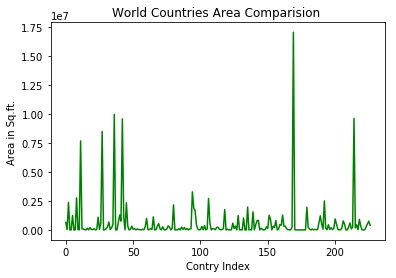

In [189]:
# using an index to filter rows and columns
area = countries.iloc[:, 3]
# using column names
name = countries["Country"]

plt.plot(area, color='green')
plt.title("World Countries Area Comparision ")
plt.xlabel("Contry Index")
plt.ylabel("Area in Sq.ft.")
plt.show()

This plot shows the area of all the countries in the world, the peaks show the most populous countries

Between 0 and 50 I see 4 peaks

Between 160 and 250 there are 2 peaks

Next I will plot two box plots side by side

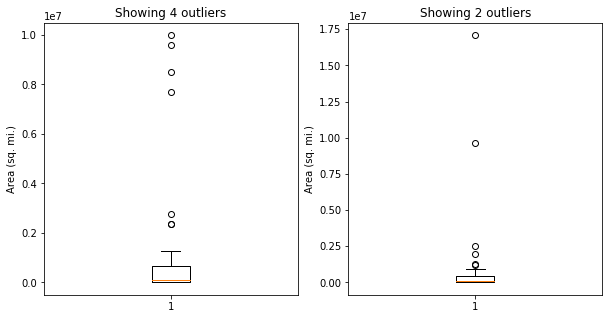

In [191]:
between0and50 = countries[(countries.index >= 0) & (countries.index <= 50)]
between160and250 = countries[(countries.index >= 160) & (countries.index <= 250)]

plt.figure(figsize = (10, 5))
plt.title("Showing outliers using boxplot")
plt.subplot(1, 2, 1)
plt.boxplot(between0and50['Area (sq. mi.)'])
plt.ylabel("Area (sq. mi.)")
plt.title("Showing 4 outliers")
plt.subplot(1, 2, 2)
plt.boxplot(between160and250['Area (sq. mi.)'])
plt.ylabel("Area (sq. mi.)")
plt.title("Showing 2 outliers")
plt.show()

In the first box plot look that the median area is close to 0 x 1e7 the 4 outliers are clearly shown, those are very far from the others 

The same is true for the second box plot. It clearly shows the two outliers


Next, I want to find the 4 populous countries indexed between 0 and 50


In [192]:
index_of_max_area = between0and50["Area (sq. mi.)"].idxmax()
print("{} is the biggest, from 0 to 50".format(between0and50.loc[index_of_max_area]["Country"]))
fourcountries = between0and50.sort_values(by=['Area (sq. mi.)'], ascending=False).iloc[:, 0:5].head(4)
fourcountries

Canada is the biggest, from 0 to 50


,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.)
36,Canada,NORTHERN AMERICA,33098932,9984670,3.3
42,China,ASIA (EX. NEAR EAST),1313973713,9596960,136.9
27,Brazil,LATIN AMER. & CARIB,188078227,8511965,22.1
11,Australia,OCEANIA,20264082,7686850,2.6


I want to find the 2 populous countries indexed between 160 and 250

In [193]:
index_of_max_area = between160and250["Area (sq. mi.)"].idxmax()
print("{} is the biggest, from 160 to 250".format(between160and250.loc[index_of_max_area]["Country"]))
twocountries = between160and250.sort_values(by=['Area (sq. mi.)'], ascending=False).iloc[:, 0:5].head(2)
twocountries

Russia is the biggest, from 160 to 250


,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.)
169,Russia,C.W. OF IND. STATES,142893540,17075200,8.4
214,United States,NORTHERN AMERICA,298444215,9631420,31.0


I tried to plot a pie chart showing the areas of the six populous countries.It is intersting that 
Russia is one country and owns around 30% of the world area(though we used 6 countries)and see that China and USA are taking equal amount, Trump should look at this graph.

Not only that, I plotted the population density of these 6 countries on the side. If we sum up the people in these six countries, 70% of them live in China, and USA is not as sparsely populated as Russia, I think Russia has a lot of unusable land or desert. Russia is taking 30% of the land but only 4% of people are actually living there.

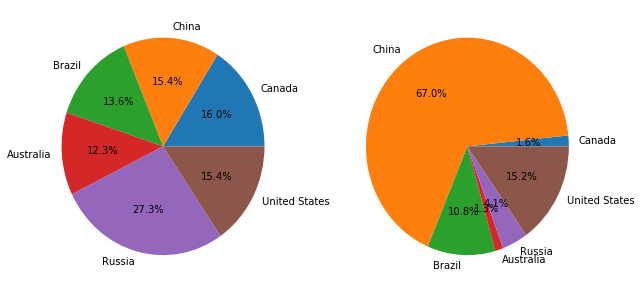

In [194]:
sixcountries = [fourcountries, twocountries]
sixcountries = pd.concat(sixcountries)

plt.figure(figsize = (10, 5))

plt.subplot(1, 2, 1)
plt.pie(sixcountries['Area (sq. mi.)'], labels=sixcountries['Country'],autopct='%1.1f%%')

plt.subplot(1, 2, 2)
plt.pie(sixcountries['Pop. Density (per sq. mi.)'], labels=sixcountries['Country'],autopct='%1.1f%%')

plt.show()

To do a scatter plot first I checked the correlation between fileds uisng dataframe.corr function.   

I found out that gdp is correlated with phone postively; and birthrate is negatively correlated with literacy

corr: gdp_phone: 
0.834499275414044
corr: brithrate_literacy: 
-0.7246144139500446


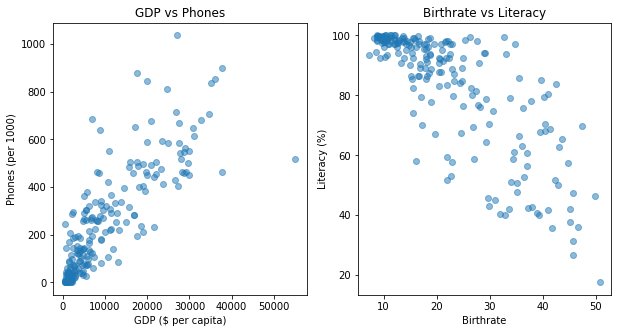

In [203]:
corrs = countries.corr(method='pearson', min_periods=1)

# GDP is highly(positively) correlated with phone, 0.8
gdp_with_phone = corrs.sort_values(by=['GDP ($ per capita)'], ascending=False).iloc[1:2,:]['GDP ($ per capita)']
print ("corr: gdp_phone: ")
print(gdp_with_phone[0])

# birthrate is highly(negatively) correlated with literacy 0.79
br_with_literacy = corrs.sort_values(by=['Birthrate'], ascending=True).iloc[1:2,:]['Birthrate']
print ("corr: brithrate_literacy: " )
print(br_with_literacy[0])

# Now let us plot the scatter plots
plt.figure(figsize = (10, 5))

plt.subplot(1, 2, 1)
plt.title("GDP vs Phones")
plt.xlabel("GDP ($ per capita)")
plt.ylabel("Phones (per 1000)")
plt.scatter(countries["GDP ($ per capita)"], countries["Phones (per 1000)"], alpha=0.5)

plt.subplot(1, 2, 2)
plt.title("Birthrate vs Literacy")
plt.xlabel("Birthrate")
plt.ylabel("Literacy (%)")
plt.scatter(countries["Birthrate"], countries["Literacy (%)"], alpha=0.5)

plt.show()

The scatter plot on the left shows positive correlation while the right shows negative correlation

If you try to draw a line on the left side, the line is forward while on the right the line will be backward

To make the next practice meanigful, I want to rearrange the countries dataframe by region
There are 11 regions

In [204]:
print("There are {} regions".format(len(set(countries.sort_values(by=["Region"], ascending=False)["Region"]))))
print("These are the 11 regions")
print(set(countries.sort_values(by=["Region"], ascending=False)["Region"]))

There are 11 regions
These are the 11 regions
{'LATIN AMER. & CARIB', 'NORTHERN AFRICA', 'NORTHERN AMERICA', 'NEAR EAST', 'C.W. OF IND. STATES', 'SUB-SAHARAN AFRICA', 'BALTICS', 'ASIA (EX. NEAR EAST)', 'WESTERN EUROPE', 'OCEANIA', 'EASTERN EUROPE'}


Let us only use the three regions, ASIA, Africa and Europe*

Sort the data by Region*


In [207]:
countries = countries.loc[countries["Region"].isin(['ASIA (EX. NEAR EAST)','SUB-SAHARAN AFRICA', 'WESTERN EUROPE'])]
# I sorted them starting from Asia to Western Europe
countries = countries.sort_values(by=["Region"], ascending=True)

#### Reassign Indices
reassigning indices is essential, If you look the data now
* index 0 to 27 contains countries from ASIA
* index 28 to 78 contains countries from Sub-Saharan Africa
* index 79 to 106 contains contries from Western Europe

There are 11 regions
These are the 11 regions
{'LATIN AMER. & CARIB', 'NORTHERN AFRICA', 'NORTHERN AMERICA', 'NEAR EAST', 'C.W. OF IND. STATES', 'SUB-SAHARAN AFRICA', 'BALTICS', 'ASIA (EX. NEAR EAST)', 'WESTERN EUROPE', 'OCEANIA', 'EASTERN EUROPE'}


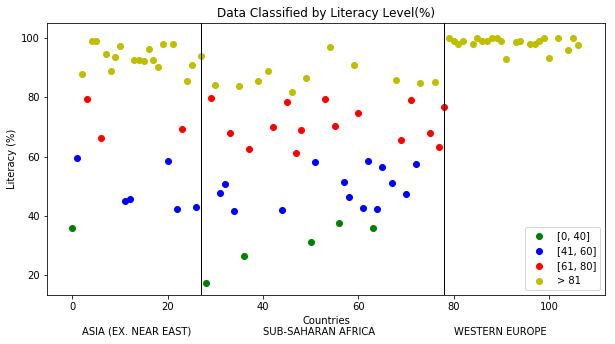

In [196]:
countries = countries.reset_index()

Now I divided the countries by literacy levels

In [ ]:
cat1 = countries.loc[(countries['Literacy (%)'] >= 0) & (countries['Literacy (%)'] <= 40)]
cat2 = countries.loc[(countries['Literacy (%)'] >= 41) & (countries['Literacy (%)'] <= 60)]
cat3 = countries.loc[(countries['Literacy (%)'] >= 61) & (countries['Literacy (%)'] <= 80)]
cat4 = countries.loc[countries['Literacy (%)'] >= 81]

Next I did the plotting

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Data Classified by Literacy Level(%)")
plt.xlabel("Countries")
plt.ylabel("Literacy (%)")
plt.scatter(cat1.index, cat1["Literacy (%)"], color = "g" , label = "[0, 40]")
plt.scatter(cat2.index, cat2["Literacy (%)"], color = "b", label = "[41, 60]")
plt.scatter(cat3.index, cat3["Literacy (%)"], color = "r", label = "[61, 80]")
plt.scatter(cat4.index, cat4["Literacy (%)"], color = "y", label = "> 81")
# Separator between ASIA and Sub-Saharan Africa
plt.axvline(x=27, ymin=0, ymax = 100, linewidth=1, color='k')
# Separator between Sub-Saharan Africa and Western Europe
plt.axvline(x=78, ymin=0, ymax = 100, linewidth=1, color='k')
#adding text labels to the categories
plt.text(2, 0.001, "ASIA (EX. NEAR EAST)")
plt.text(40, 0.001, "SUB-SAHARAN AFRICA")
plt.text(80, 0.001, "WESTERN EUROPE")

plt.legend(loc=4)
plt.show()

In the above graph we can see that all West Europeans have a literacy rate above 81%. It is amazing achievement. The graph clearly shows that Africa has more countries in the 0 to 40 range than Asia. Asia has 7 more countries in the >81 category than Africa eventhough 50 countries participated from Africa and 28 from Asia. Most African countries are in the blue and red range. 

The Near East as defined as the Ottoman Empire at the beginning of the Eastern Question. According to the National Geographic Society, the terms Near East and Middle East denote the same territories and are "generally accepted as comprising the countries of the Arabian Peninsula, Cyprus, Egypt, Iraq, Iran, Israel, Jordan, Lebanon, Palestinian territories, Syria, and Turkey". 

I found the above statements from Wikipedia